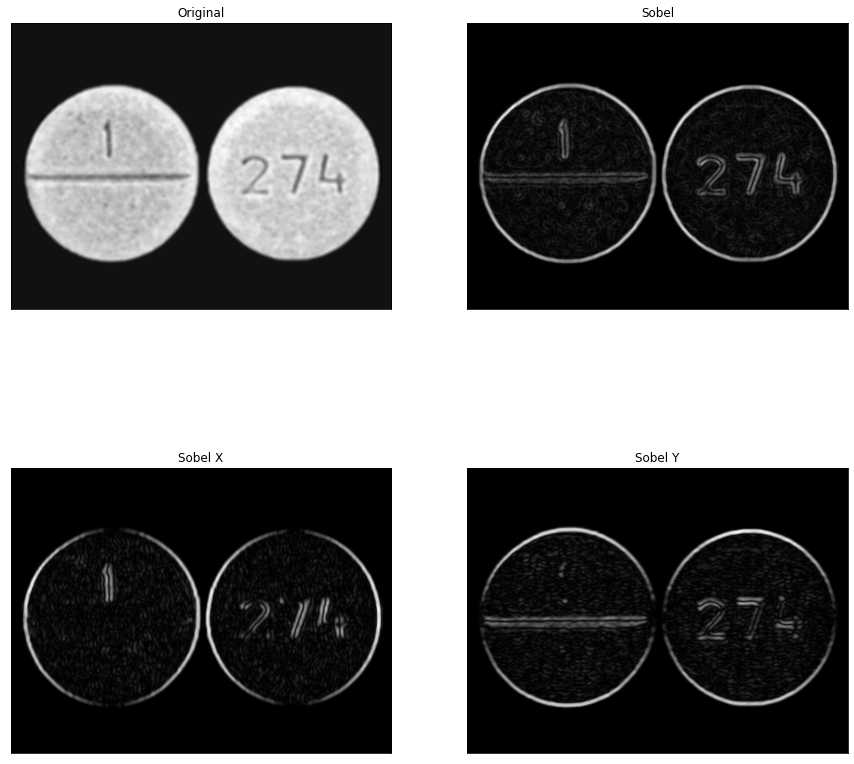

'done'

In [47]:
import sys
import cv2 as cv
import matplotlib.pyplot as plt

def main():
    
    scale = 1
    delta = 0
    ddepth = cv.CV_16S
    
    
    # Load the image
    src = cv.imread("pill.jpg",0)
   
    
    # noise reduction with low-pass filter "Gaussian Filter"
    src = cv.GaussianBlur(src, (7, 7), 4)
    
    
    # Gradient-X
    grad_x = cv.Sobel(src, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    grad_y = cv.Sobel(src, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
    
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)
    
    # This function is to merge two images (gradient x,gradient y) into one image
    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    
    fig, ax = plt.subplots(2,2,figsize=(15,15))

    plt.subplot(2,2,1),plt.imshow(src,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,2,2),plt.imshow(grad,cmap = 'gray')
    plt.title('Sobel'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,2,3),plt.imshow(abs_grad_x,cmap = 'gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,2,4),plt.imshow(abs_grad_y,cmap = 'gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

    plt.show()
    
    return "done"

main()

## Another way of sobel filter

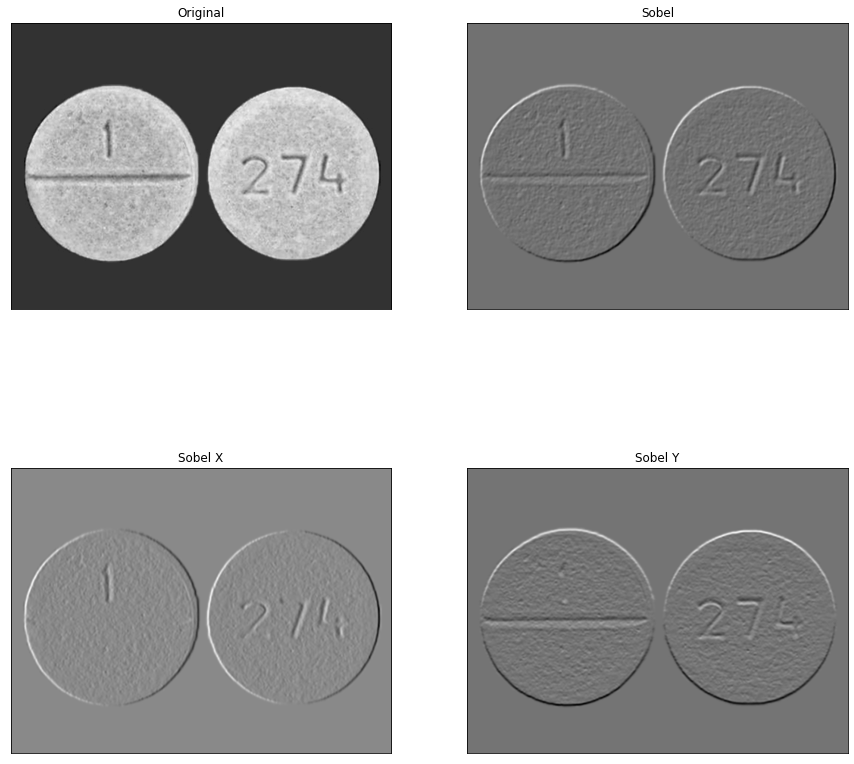

In [48]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


img = cv.imread('pill.jpg',0)

sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=7)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=7)
sobel = cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

fig, ax = plt.subplots(2,2,figsize=(15,15))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

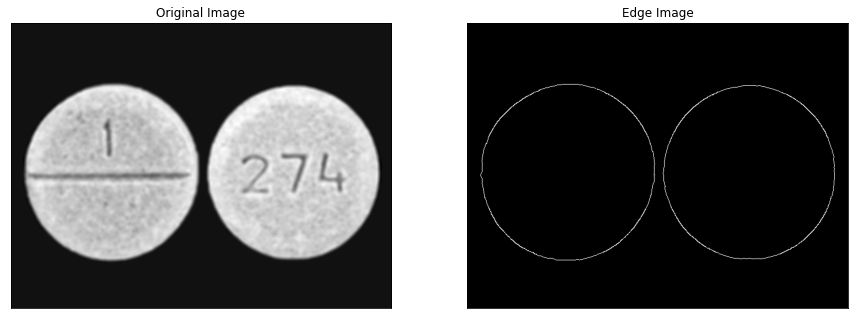

In [49]:
#ref:https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
import numpy as np
import cv2 
from matplotlib import pyplot as plt

img = cv2.imread('pill.jpg',0)
img = cv2.GaussianBlur(img, (7,7),4) #the more sigma , the higher the blurring , the less the details, the less the edges detected
edges = cv2.Canny(img,0,106)

fig, ax = plt.subplots(figsize=(15,15))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# First Question
- Sobel Filter is quite susceptible to noise or "unwanted date" and does not make for the best edge detector. for example, we need to detect only the outliers of the pill not the "noise" or "unwanted date" inside it. So we need to add more steps on to the process to extract better edges with canny technique

# Second Question
- In Gaussian Filter, the more sigma , the higher the blurring , the less the details, the less the edges detected